In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# json 파일 처리
import json

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# Train 데이터에서 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [ ]:
# 모델
from tensorflow import keras

In [ ]:
# 랜덤숫자 생성
import random

# 변수 목록

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [ ]:
# train_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0515/Female/Train/"
# test_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0515/Female/Test/"

train_dir_name = "./Dataset/Musinsa_Dataset/Train-Test/Female/Train/"
test_dir_name = "./Dataset/Musinsa_Dataset/Train-Test/Female/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [ ]:
label_name = ['Girlish', 'Gofcore', 'Golf', 'Retro', 'Romantic', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']

In [ ]:
season_name = ['Spring', 'Summer', 'Autumn', 'Winter']
new_season_name = ['Spring-Autumn', 'Summer', 'Winter']

# Train-Test 데이터 불러오기

In [ ]:
# print(len(os.listdir(train_dir_name + "Image")))
# 19585

In [ ]:
x_train_ori = []
y_train_ori = []

for i in range(0, 19586):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break

    # if label_file['Labeling'] != 'Romantic': # romantic은 데이터가 3개밖에 없으므로 남겨둔다
    #   if label_file['Season'] != 'Spring':
    #     if label_file['Season'] != 'Autumn':
    #       continue

    # 이미지 파일 로드
    img_file_color = cv2.imread(img_path)
    if img_file_color is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 이미지 파일을 흑백으로 변환
    # img_file_gray = cv2.cvtColor(img_file_color, cv2.COLOR_BGR2GRAY)


    x_train_ori.append(img_file_color)
    y_train_ori.append(label_file)


    if len(y_train_ori)%500 == 0: # 진행도 확인용
        print(str(len(y_train_ori)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
8500개 파일 읽기 완료
9000개 파일 읽기 완료
9500개 파일 읽기 완료
10000개 파일 읽기 완료
10500개 파일 읽기 완료
11000개 파일 읽기 완료
11500개 파일 읽기 완료
12000개 파일 읽기 완료
12500개 파일 읽기 완료
13000개 파일 읽기 완료
13500개 파일 읽기 완료
14000개 파일 읽기 완료
14500개 파일 읽기 완료
15000개 파일 읽기 완료
15500개 파일 읽기 완료
16000개 파일 읽기 완료
16500개 파일 읽기 완료
17000개 파일 읽기 완료
17500개 파일 읽기 완료
18000개 파일 읽기 완료
18500개 파일 읽기 완료
19000개 파일 읽기 완료
19500개 파일 읽기 완료
Complete


In [ ]:
# print(len(os.listdir(test_dir_name + "Image")))
# 4900

In [ ]:
x_test = []
y_test_ori = []

for i in range(0, 4901):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break

    # if label_file['Labeling'] != 'Romantic': # romantic은 데이터가 3개밖에 없으므로 남겨둔다
    #   if label_file['Season'] != 'Spring':
    #     if label_file['Season'] != 'Autumn':
    #       continue


    # 이미지 파일 로드
    img_file_color = cv2.imread(img_path)
    if img_file_color is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 이미지 파일을 흑백으로 변환
    # img_file_gray = cv2.cvtColor(img_file_color, cv2.COLOR_BGR2GRAY)


    x_test.append(img_file_color)
    y_test_ori.append(label_file)


    if len(y_test_ori)%500 == 0: # 진행도 확인용
        print(str(len(y_test_ori)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
Complete


# 이미지 확인

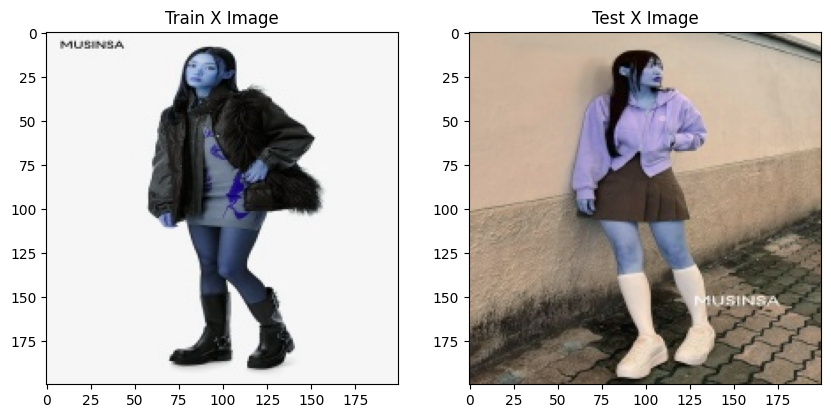

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_train_ori[0])
plt.title("Train X Image")

plt.subplot(1, 2, 2)
plt.imshow(x_test[0])
plt.title("Test X Image")

plt.show()

# 학습을 위해 X,Y데이터 형식 변경

In [ ]:
x_train_ori = np.array(x_train_ori)
x_train_ori.shape

(19584, 200, 200, 3)

In [ ]:
x_test = np.array(x_test)
x_test.shape

(4900, 200, 200, 3)

In [ ]:
y_train = []
season_train = []

for item in y_train_ori:
  label_num = label_name.index(item['Labeling'])
  # label_num = season_name.index(item['Season'])

  '''
  if label_num == 0: # Spring
    new_label_num = 0 # Spring-Autumn
  elif label_num == 1: # Summer
    new_label_num = 1 # Summer
  elif label_num == 2: # Autumn
    new_label_num = 0 # Spring-Autumn
  else: # Winter
    new_label_num = 2 # Winter
  '''

  y_train.append(label_num)
  season_train.append(item["Season"])

print(y_train[0])
print(season_train[0])

0
Winter


In [ ]:
y_test = []
season_test = []

for item in y_test_ori:
  label_num = label_name.index(item['Labeling'])
  # label_num = season_name.index(item['Season'])

  '''
  if label_num == 0: # Spring
    new_label_num = 0 # Spring-Autumn
  elif label_num == 1: # Summer
    new_label_num = 1 # Summer
  elif label_num == 2: # Autumn
    new_label_num = 0 # Spring-Autumn
  else: # Winter
    new_label_num = 2 # Winter
  '''

  y_test.append(label_num)
  season_test.append(item["Season"])

print(y_test[0])
print(season_test[0])

0
Winter


In [ ]:
y_train = np.array(y_train)
y_train.shape

(19584,)

In [ ]:
y_train = y_train.astype('uint8')
y_train.dtype

dtype('uint8')

In [ ]:
y_test = np.array(y_test)
y_test.shape

(4900,)

In [ ]:
y_test = y_test.astype('uint8')
y_test.dtype

dtype('uint8')

# 계절 정보 통계

## Train 계절 통계

In [ ]:
season_count = []

season_count.append(season_train.count('Spring'))
season_count.append(season_train.count('Summer'))
season_count.append(season_train.count('Autumn'))
season_count.append(season_train.count('Winter'))
season_count.append(season_train.count('None'))

print(season_count)

[5763, 4549, 3703, 5569, 0]


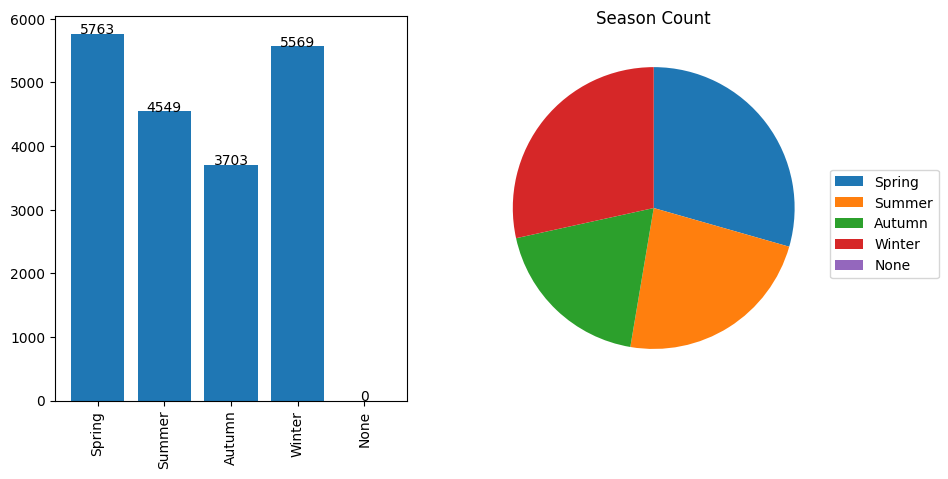

In [ ]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

## Test 계절 통계

In [ ]:
season_count = []

season_count.append(season_test.count('Spring'))
season_count.append(season_test.count('Summer'))
season_count.append(season_test.count('Autumn'))
season_count.append(season_test.count('Winter'))
season_count.append(season_test.count('None'))

print(season_count)

[1442, 1136, 927, 1395, 0]


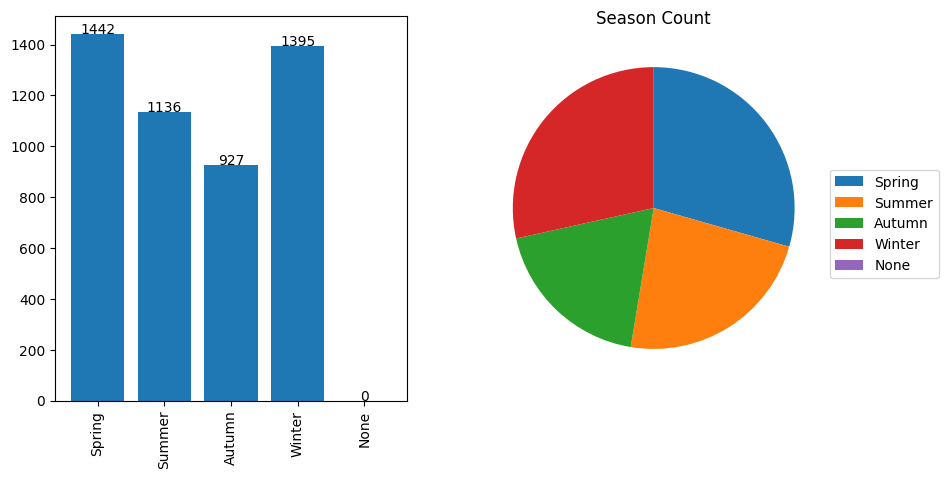

In [ ]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

# Train 데이터에서 Validation 데이터 분리

In [ ]:
y_train_all = y_train[:]

x_train = []
y_train = []
x_val = []
y_val = []

x_train, x_val, y_train, y_val = train_test_split(x_train_ori, y_train_all, test_size=0.25, stratify=y_train_all)

In [ ]:
x_train.shape

(14688, 200, 200, 3)

In [ ]:
y_train.shape

(14688,)

In [ ]:
x_val.shape

(4896, 200, 200, 3)

In [ ]:
y_val.shape

(4896,)

# 학습 데이터 통계

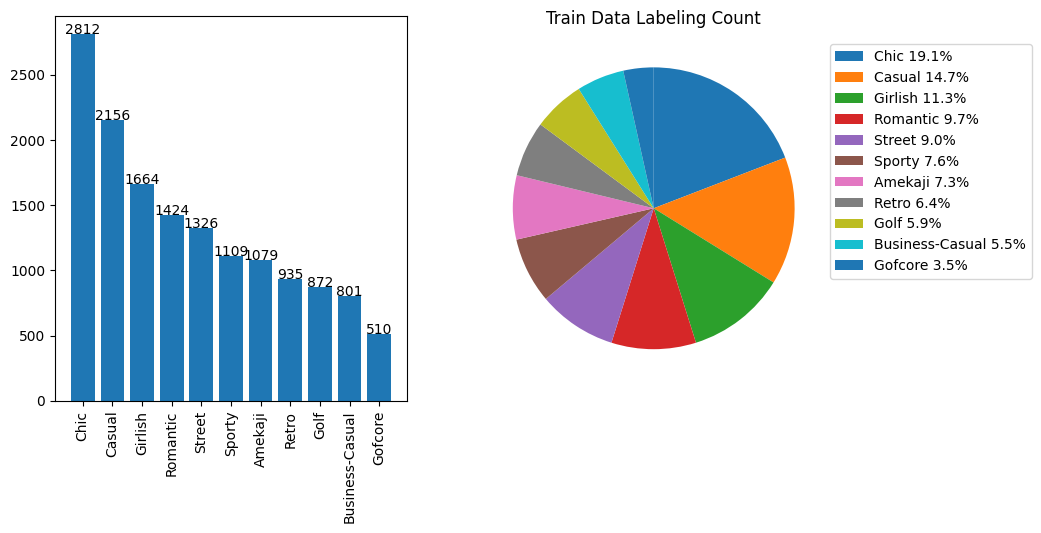

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_train:
    label = label_name[item]
    # label = new_season_name[item]
    if label not in label_count: # 해당 키가 없을 경우
        label_count[label] = 1
    else:
        label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Train Data Labeling Count")
plt.show()

In [ ]:
# tmp_index = list(y_train).index(3)
# tmp_index

In [ ]:
# list(y_train).count(3)

In [ ]:
# x_val = np.append(x_val, [x_train[tmp_index]], axis=0)
# x_train = np.delete(x_train, tmp_index, axis=0)

# y_val = np.append(y_val, y_train[tmp_index])
# y_train = np.delete(y_train, tmp_index, axis=0)

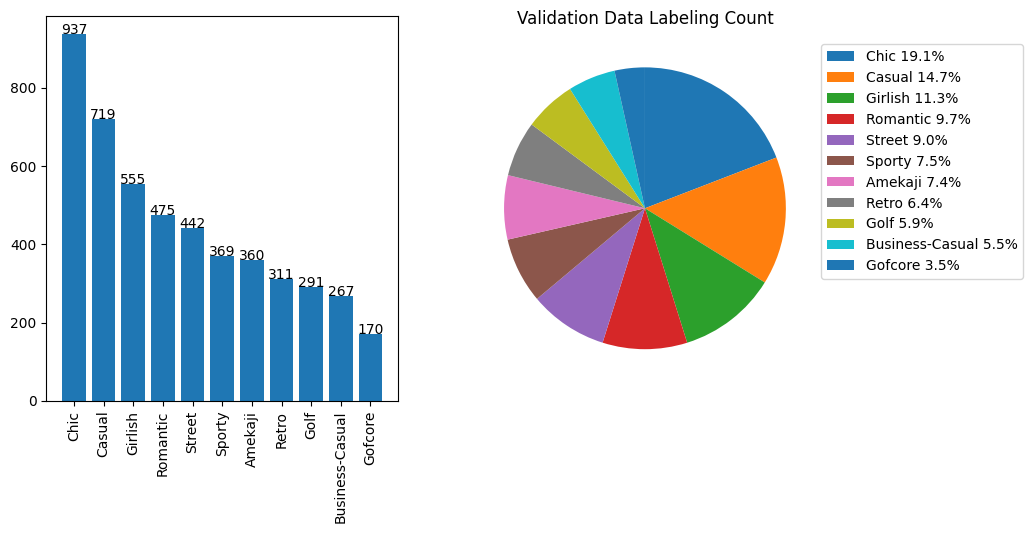

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_val:
  label = label_name[item]
  # label = new_season_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Validation Data Labeling Count")
plt.show()

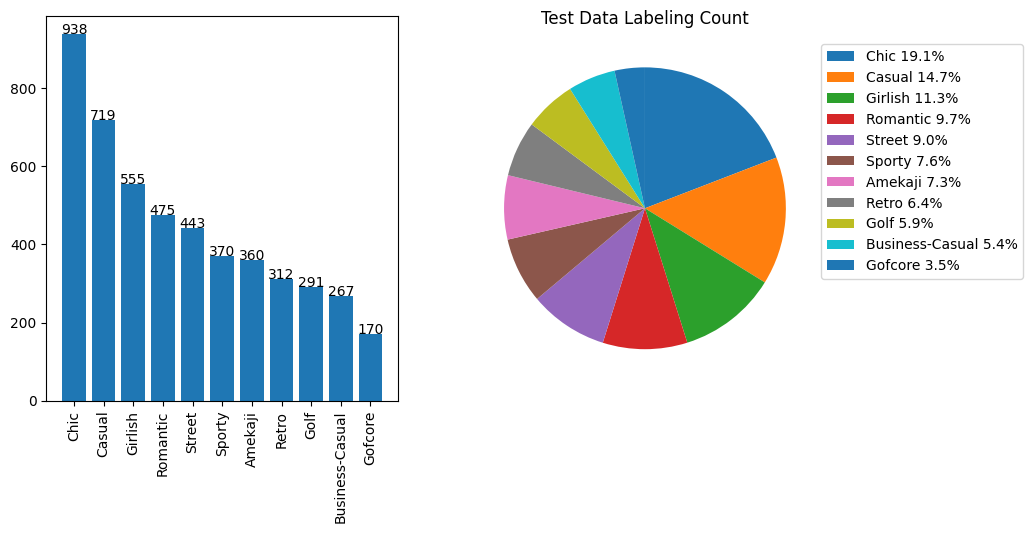

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_test:
  label = label_name[item]
  # label = new_season_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Test Data Labeling Count")
plt.show()

# 모델 생성

In [ ]:
def Vgg():
  input_img = keras.layers.Input(shape=(img_height, img_width, 3))
  # input_img = keras.layers.Input(shape=(img_height, img_width, 1))

  conv1 = keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_img)
  conv1 = keras.layers.Dropout(0.3)(conv1)
  conv1 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1)
  pool1 = keras.layers.MaxPooling2D(2)(conv1)

  conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool1)
  conv2 = keras.layers.Dropout(0.3)(conv2)
  conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv2)
  pool2 = keras.layers.MaxPooling2D(2)(conv2)

  conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool2)
  conv3 = keras.layers.Dropout(0.4)(conv3)
  conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv3)
  pool3 = keras.layers.MaxPooling2D(2)(conv3)

  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool3)
  conv4 = keras.layers.Dropout(0.4)(conv4)
  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv4)
  conv4 = keras.layers.Dropout(0.4)(conv4)
  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv4)
  pool4 = keras.layers.MaxPooling2D(2)(conv4)

  flat = keras.layers.Flatten()(pool4)

  dense1 = keras.layers.Dense(1000, activation='relu')(flat)
  dense1 = keras.layers.Dropout(0.4)(dense1)

  dense2 = keras.layers.Dense(1000, activation='relu')(dense1)
  dense2 = keras.layers.Dropout(0.4)(dense2)

  dense3 = keras.layers.Dense(500, activation='relu')(dense2)
  dense3 = keras.layers.Dropout(0.4)(dense3)

  # dense4 = keras.layers.Dense(1000, activation='relu')(dense3)
  # dense4 = keras.layers.Dropout(0.4)(dense4)

  # dense5 = keras.layers.Dense(1000, activation='relu')(dense4)
  # dense5 = keras.layers.Dropout(0.4)(dense5)


  # 모델이 총 11개의 패션 타입을 분류하므로 마지막 층은 11개의 뉴런 설정
  output_label = keras.layers.Dense(11, activation='softmax', name='OutputLayer')(dense3)

  # 모델이 총 3개의 계절 타입을 분류하므로 마지막 층은 4개의 뉴런 설정
  # output_label = keras.layers.Dense(3, activation='softmax', name='OutputLayer')(dense5)

  model = keras.Model(input_img, output_label)
  return model

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4):
  # Input:
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = keras.layers.Conv2D(filters=f1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  #
  path1 = keras.layers.Dropout(0.2)(path1)
  path1 = keras.layers.Conv2D(filters=f1, kernel_size = 1, padding = 'same', activation = 'relu')(path1)

  # 2nd path
  path2 = keras.layers.Conv2D(filters = f2_conv1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  path2 = keras.layers.Conv2D(filters = f2_conv3, kernel_size = 3, padding = 'same', activation = 'relu')(path2)
  #
  path2 = keras.layers.Dropout(0.2)(path2)
  path2 = keras.layers.Conv2D(filters = f2_conv3, kernel_size = 3, padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = keras.layers.Conv2D(filters = f3_conv1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  path3 = keras.layers.Conv2D(filters = f3_conv5, kernel_size = 5, padding = 'same', activation = 'relu')(path3)
  #
  path3 = keras.layers.Dropout(0.2)(path3)
  path3 = keras.layers.Conv2D(filters = f3_conv5, kernel_size = 5, padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = keras.layers.MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = keras.layers.Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)
  #
  path4 = keras.layers.Dropout(0.2)(path4)
  path4 = keras.layers.Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = keras.layers.concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  # input layer
  input_layer = keras.layers.Input(shape = (img_height, img_width, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = keras.layers.Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  # X = keras.layers.MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = keras.layers.Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)
  #
  X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = keras.layers.Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)
  #
  X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = keras.layers.MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = keras.layers.MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  # X1 = keras.layers.AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  # X1 = keras.layers.Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  # X1 = keras.layers.Flatten()(X1)
  # X1 = keras.layers.Dense(1024, activation = 'relu')(X1)
  # X1 = keras.layers.Dropout(0.7)(X1)
  # X1 = keras.layers.Dense(5, activation = 'softmax')(X1)


  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  # X2 = keras.layers.AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  # X2 = keras.layers.Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  # X2 = keras.layers.Flatten()(X2)
  # X2 = keras.layers.Dense(1024, activation = 'relu')(X2)
  # X2 = keras.layers.Dropout(0.7)(X2)
  # X2 = keras.layers.Dense(1000, activation = 'softmax')(X2)


  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = keras.layers.MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer
  X = keras.layers.GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer
  X = keras.layers.Dropout(0.4)(X)

  # output layer
  # X = keras.layers.Dense(1000, activation = 'softmax')(X)
  # 모델이 총 11개의 패션 타입을 분류하므로 마지막 층은 11개의 뉴런 설정
  X = keras.layers.Dense(11, activation='softmax', name='OutputLayer')(X)

  # model
  # model = keras.Model(input_layer, [X, X1, X2], name = 'GoogLeNet')
  model = keras.Model(input_layer, X, name = 'GoogLeNet')

  return model

In [ ]:
fashion_model = GoogLeNet()

In [ ]:
# adam learning_rate 기본값 0.001
adam = keras.optimizers.Adam(learning_rate=0.00001)
fashion_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
fashion_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 97, 97, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 97, 97, 64)           4160      ['conv2d[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 97, 97, 64)           0         ['conv2d_1[0][0]']            
                                                                                          

## 모델이 덮어쓰기되지 않도록 이름 잊지말고 바꿔주기

In [ ]:
fashion_model_path = model_dir_name + 'fashion_classification_female_0613_06.keras'

In [ ]:
fashion_model = keras.models.load_model(fashion_model_path)
fashion_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_475 (Conv2D)         (None, 97, 97, 64)           9472      ['input_8[0][0]']             
                                                                                                  
 conv2d_476 (Conv2D)         (None, 97, 97, 64)           4160      ['conv2d_475[0][0]']          
                                                                                                  
 dropout_11 (Dropout)        (None, 97, 97, 64)           0         ['conv2d_476[0][0]']          
                                                                                          

# 모델 학습

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(fashion_model_path, save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = fashion_model.fit(x_train, y_train,
                            epochs=50, verbose=1,
                            validation_data=(x_val, y_val),
                            callbacks=[checkpoint_cb, early_stopping_cb])

print()
print("Complete")

Epoch 1/50
459/459 [==============================] - 260s 566ms/step - loss: 1.4734 - sparse_categorical_accuracy: 0.4803 - val_loss: 1.9497 - val_sparse_categorical_accuracy: 0.3303
Epoch 2/50
459/459 [==============================] - 258s 562ms/step - loss: 1.4709 - sparse_categorical_accuracy: 0.4846 - val_loss: 1.9179 - val_sparse_categorical_accuracy: 0.3452
Epoch 3/50
459/459 [==============================] - 258s 562ms/step - loss: 1.4623 - sparse_categorical_accuracy: 0.4854 - val_loss: 1.9138 - val_sparse_categorical_accuracy: 0.3450
Epoch 4/50
459/459 [==============================] - 258s 561ms/step - loss: 1.4525 - sparse_categorical_accuracy: 0.4890 - val_loss: 1.8943 - val_sparse_categorical_accuracy: 0.3472
Epoch 5/50
459/459 [==============================] - 258s 562ms/step - loss: 1.4469 - sparse_categorical_accuracy: 0.4845 - val_loss: 1.8903 - val_sparse_categorical_accuracy: 0.3517
Epoch 6/50
459/459 [==============================] - 258s 563ms/step - loss: 1.

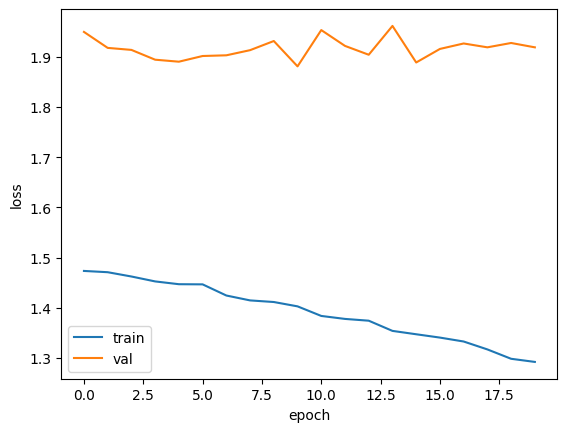

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 테스트

In [ ]:
saved_model_path = model_dir_name + 'fashion_classification_female_0613_06.keras'

saved_model = keras.models.load_model(saved_model_path)

In [ ]:
saved_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_475 (Conv2D)         (None, 97, 97, 64)           9472      ['input_8[0][0]']             
                                                                                                  
 conv2d_476 (Conv2D)         (None, 97, 97, 64)           4160      ['conv2d_475[0][0]']          
                                                                                                  
 dropout_11 (Dropout)        (None, 97, 97, 64)           0         ['conv2d_476[0][0]']          
                                                                                          

## 1개 Test 데이터 예측결과 확인

In [ ]:
y_test.shape

(4900,)

In [ ]:
num = random.randint(0, 4900)
print("Random Number : ", num)

preds = saved_model.predict(x_test[num:num+1])
type(preds)

Random Number :  3758
1/1 [==============================] - 4s 4s/step


numpy.ndarray

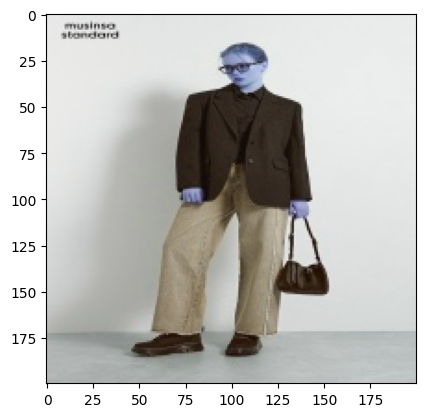

True Label :  Chic
Pred Label :  Chic


In [ ]:
true_label = label_name[y_test[num]]
pred_label = label_name[np.argmax(preds)]

# true_label = new_season_name[y_test[num]]
# pred_label = new_season_name[np.argmax(preds)]

plt.imshow(x_test[num])
plt.show()

print('True Label : ', true_label)
print('Pred Label : ', pred_label)

## 전체 Test 데이터 정확도 확인

In [ ]:
 saved_model.evaluate(x_test, y_test)

154/154 [==============================] - 27s 170ms/step - loss: 1.9118 - sparse_categorical_accuracy: 0.3457


[1.9117767810821533, 0.345714271068573]